In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")
plt.style.available
plt.style.use('fivethirtyeight')

Making estimation for covid19 for colombia. Dataset imported daily from:
- The data files for the four metrics we present are available to download here:
- **Total confirmed cases:** https://covid.ourworldindata.org/data/total_cases.csv
- **Total deaths:** https://covid.ourworldindata.org/data/total_deaths.csv
- **New confirmed cases:** https://covid.ourworldindata.org/data/new_cases.csv
- **New deaths:** https://covid.ourworldindata.org/data/new_deaths.csv
- **Full dataset:** https://covid.ourworldindata.org/data/full_data.csv

In [2]:
data_full=pd.read_csv("https://covid.ourworldindata.org/data/full_data.csv")
#data_full["total_cases"][533]==56
data_full[(data_full["location"]=="Colombia")]

,date,location,new_cases,new_deaths,total_cases,total_deaths
555,2020-03-07,Colombia,NaN,NaN,1,NaN
556,2020-03-08,Colombia,0.0,NaN,1,NaN
557,2020-03-09,Colombia,0.0,NaN,1,NaN
558,2020-03-10,Colombia,2.0,NaN,3,NaN
559,2020-03-11,Colombia,0.0,NaN,3,NaN
560,2020-03-12,Colombia,6.0,NaN,9,NaN
561,2020-03-13,Colombia,0.0,NaN,9,NaN
562,2020-03-14,Colombia,7.0,NaN,16,NaN
563,2020-03-15,Colombia,8.0,NaN,24,NaN
564,2020-03-16,Colombia,0.0,NaN,24,NaN


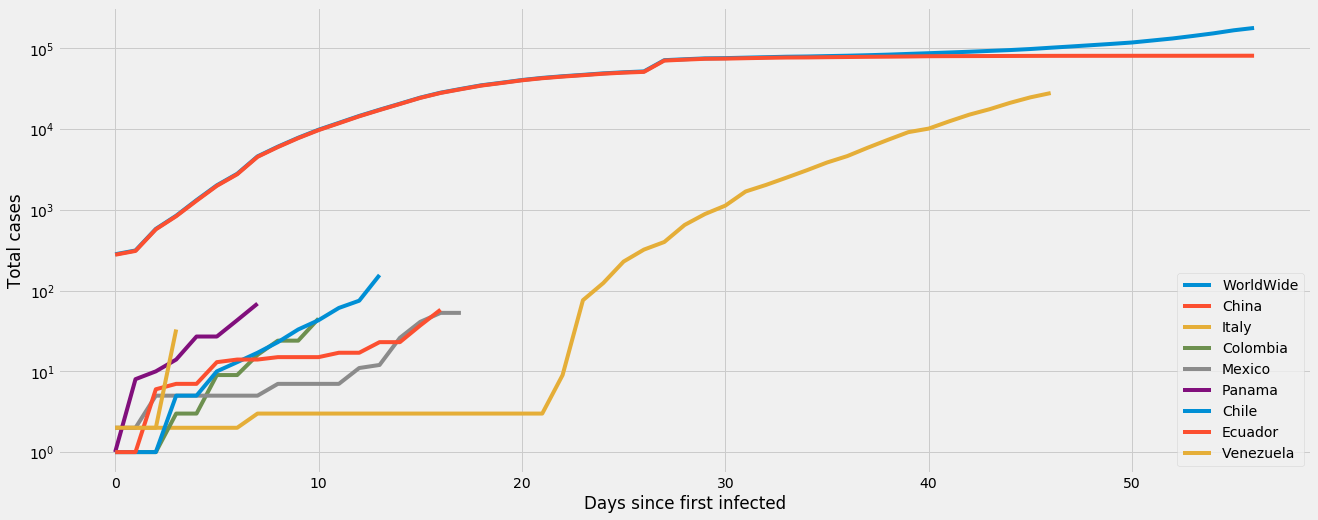

In [3]:
isworldwide=data_full["location"]=="World"
ischina=data_full["location"]=="China"
iscolombia=data_full["location"]=="Colombia"
isitaly=data_full["location"]=="Italy"
ismexico=data_full["location"]=="Mexico"
ischile=data_full["location"]=="Chile"
isecuador=data_full["location"]=="Ecuador"
ispanama=data_full["location"]=="Panama"
isvenezuela=data_full["location"]=="Venezuela"


plt.figure(figsize=(20,8))
plt.plot(np.arange(0,len(data_full["date"][isworldwide]),1),data_full["total_cases"][isworldwide],label="WorldWide")
plt.plot(np.arange(0,len(data_full["date"][ischina]),1),data_full["total_cases"][ischina],label="China")
plt.plot(np.arange(0,len(data_full["date"][isitaly]),1),data_full["total_cases"][isitaly],label="Italy")
plt.plot(np.arange(0,len(data_full["date"][iscolombia]),1),data_full["total_cases"][iscolombia],label="Colombia")
plt.plot(np.arange(0,len(data_full["date"][ismexico]),1),data_full["total_cases"][ismexico],label="Mexico")
plt.plot(np.arange(0,len(data_full["date"][ispanama]),1),data_full["total_cases"][ispanama],label="Panama")
plt.plot(np.arange(0,len(data_full["date"][ischile]),1),data_full["total_cases"][ischile],label="Chile")
plt.plot(np.arange(0,len(data_full["date"][isecuador]),1),data_full["total_cases"][isecuador],label="Ecuador")
plt.plot(np.arange(0,len(data_full["date"][isvenezuela]),1),data_full["total_cases"][isvenezuela],label="Venezuela")

plt.xticks(rotation=0)
plt.yscale("log")
plt.xlabel("Days since first infected")
plt.ylabel("Total cases")

plt.legend()
plt.show()

In [4]:
np.unique(data_full["location"])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chile', 'China', 'Colombia', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Democratic Republic of Congo',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt',
       'Equatorial Guinea', 'Estonia', 'Ethiopia', 'Faeroe Islands',
       'Finland', 'France', 'French Guiana', 'French Polynesia', 'Gabon',
       'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Guadeloupe',
       'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guyana', 'Honduras',
       'Hungary', 'Iceland', 'India', 'Indo

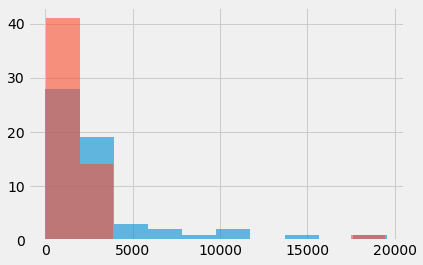

In [5]:
plt.hist(data_full["new_cases"][isworldwide],histtype='stepfilled',alpha=0.6)
plt.hist(data_full["new_cases"][ischina],histtype='stepfilled',alpha=0.6)
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [8]:
dates_world=np.arange(0,len(data_full[isworldwide]),1)
dates_world

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56])

In [9]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
model = LogisticRegression(solver='newton-cg', random_state=0).fit(dates_world.reshape(-1,1), np.array(data_full[isworldwide]["total_cases"]))

In [11]:
model.classes_

array([   282,    314,    581,    846,   1320,   2014,   2798,   4593,
         6065,   7818,   9826,  11953,  14557,  17391,  20630,  24544,
        28276,  31481,  34886,  37558,  40554,  43103,  45171,  46997,
        49053,  50580,  51857,  71429,  73332,  75204,  75748,  76769,
        77794,  78811,  79331,  80239,  81109,  82294,  83652,  85403,
        87137,  88948,  90869,  93090,  95324,  98192, 101927, 105592,
       109577, 113702, 118319, 125260, 132758, 142534, 153517, 167506,
       179112])

In [12]:
model.intercept_

array([ 22.50458612,  22.097425  ,  21.68815792,  21.27704881,
        20.861285  ,  20.43796904,  20.00474437,  19.55993894,
        19.10184342,  18.62971738,  18.14262947,  17.64012014,
        17.12167728,  16.58685428,  16.03517085,  15.46633717,
        14.87979848,  14.27501665,  13.6516576 ,  13.00872193,
        12.34570665,  11.66186432,  10.95634963,  10.22825764,
         9.47657231,   8.70016908,   7.89790419,   7.06858235,
         6.21065764,   5.32248262,   4.40231643,   3.44819657,
         2.4579356 ,   1.42906003,   0.35886108,  -0.75576145,
        -1.91850917,  -3.1335524 ,  -4.40544371,  -5.73940835,
        -7.14168274,  -8.619666  , -10.18207898, -11.8393168 ,
       -13.60400003, -15.49173849, -17.52223138, -19.72092048,
       -22.12153433, -24.77014051, -27.73189995, -31.10281853,
       -35.03085886, -39.75595292, -45.69228137, -53.61015529,
       -65.04566423])

In [13]:
model.coef_

array([[-1.56349954e+00],
       [-1.35196225e+00],
       [-1.20324936e+00],
       [-1.08989612e+00],
       [-9.98086087e-01],
       [-9.20370494e-01],
       [-8.52429818e-01],
       [-7.91607605e-01],
       [-7.36128123e-01],
       [-6.84833693e-01],
       [-6.36871966e-01],
       [-5.91640997e-01],
       [-5.48673920e-01],
       [-5.07611158e-01],
       [-4.68162686e-01],
       [-4.30104327e-01],
       [-3.93236472e-01],
       [-3.57393825e-01],
       [-3.22447771e-01],
       [-2.88255659e-01],
       [-2.54719212e-01],
       [-2.21742171e-01],
       [-1.89236530e-01],
       [-1.57122711e-01],
       [-1.25326192e-01],
       [-9.37767804e-02],
       [-6.24112373e-02],
       [-3.11710338e-02],
       [ 8.64055306e-06],
       [ 3.11896242e-02],
       [ 6.24309859e-02],
       [ 9.37934837e-02],
       [ 1.25339488e-01],
       [ 1.57134647e-01],
       [ 1.89246091e-01],
       [ 2.21746745e-01],
       [ 2.54720579e-01],
       [ 2.88257648e-01],
       [ 3.2

In [14]:
model.predict_proba(dates_world.reshape(-1,1))

array([[3.40077990e-01, 2.26334470e-01, 1.50317057e-01, ...,
        8.20455999e-31, 2.98790194e-34, 3.22840426e-39],
       [2.50078046e-01, 2.05644558e-01, 1.58474713e-01, ...,
        9.59676872e-30, 4.05522538e-33, 5.41350936e-38],
       [1.71080210e-01, 1.73824468e-01, 1.55431431e-01, ...,
        1.04429194e-28, 5.12024588e-32, 8.44494912e-37],
       ...,
       [8.39698915e-37, 5.10796154e-32, 1.04257010e-28, ...,
        1.55426724e-01, 1.73819521e-01, 1.71082527e-01],
       [5.38244584e-38, 4.04550902e-33, 9.58111403e-30, ...,
        1.58472702e-01, 2.05639358e-01, 2.50066590e-01],
       [3.20974500e-39, 2.98080465e-34, 8.19146418e-31, ...,
        1.50320432e-01, 2.26333435e-01, 3.40048194e-01]])

In [15]:
model.predict(dates_world.reshape(-1,1))

array([   282,    282,    314,    581,    846,   1320,   2014,   2798,
         4593,   6065,   7818,   9826,  11953,  14557,  20630,  24544,
        28276,  31481,  34886,  37558,  40554,  43103,  45171,  46997,
        49053,  50580,  51857,  71429,  73332,  75204,  75748,  76769,
        77794,  78811,  79331,  80239,  81109,  82294,  83652,  85403,
        87137,  88948,  90869,  95324,  98192, 101927, 105592, 109577,
       113702, 118319, 125260, 132758, 142534, 153517, 167506, 179112,
       179112])

In [16]:
model.score(dates_world.reshape(-1,1), np.array(data_full[isworldwide]["total_cases"]))

0.543859649122807

## The model
We try to fit model of grows by mean of a logistic equation plus a relaxion term:

$f=\frac{a}{1+e^{-bt+c}}(1-e^{-dt+e})$

In the case of colombia..

In [17]:
from scipy.optimize import curve_fit
def growth(t,a,b,c,d,e):
    return np.exp(a*t+b)#(a)/(1+np.exp(-b*t+c))#*(1-t*np.exp(-d*t+e))

In [18]:
data_prove,name=data_full[iscolombia],"Colombia"
popt, pcov = curve_fit(growth, np.arange(0,len(data_prove),1), np.array(data_prove["total_cases"]),method="dogbox")

In [19]:
popt

array([0.36904822, 0.07248167, 1.        , 1.        , 1.        ])

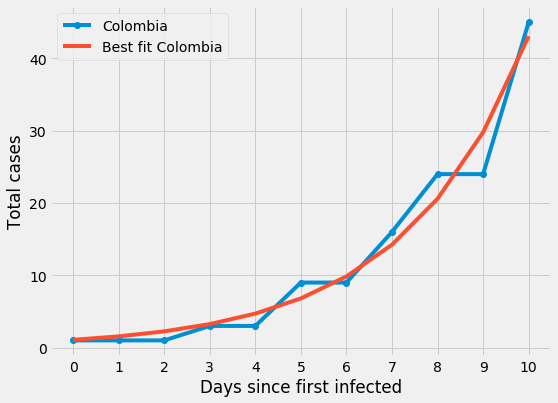

In [20]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(0,len(data_prove["total_cases"]),1),data_prove["total_cases"],label=name,marker=".",markersize=12)
plt.plot(np.arange(0,len(data_prove["total_cases"]),1), growth(np.arange(0,len(data_prove),1), *popt),label="Best fit "+name)
plt.legend()
plt.xticks(np.arange(0,len(data_prove["total_cases"]),1),rotation=0)
plt.xlabel("Days since first infected")
plt.ylabel("Total cases")
plt.show()

Estimation for future days.

In [21]:
rng = pd.date_range(data_prove["date"].iloc[0], periods=30, freq='D')
df = pd.DataFrame({ 'Date': rng, 'Val': growth(np.arange(0,len(rng),1), *popt) }) 
#df

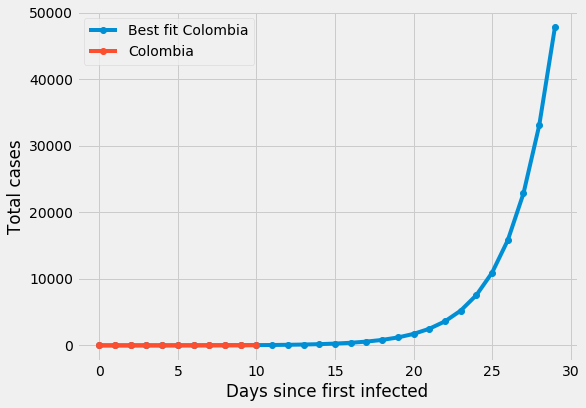

In [22]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(0,len(df["Date"]),1), df["Val"],label="Best fit "+name,marker=".",markersize=12)
plt.plot(np.arange(0,len(data_prove["total_cases"]),1),data_prove["total_cases"],label=name,marker=".",markersize=12)

plt.legend()
#plt.yscale("log")
plt.xticks(rotation=0)
plt.xlabel("Days since first infected")
plt.ylabel("Total cases")

plt.show()

In [23]:
df

,Date,Val
0,2020-03-07,1.075173
1,2020-03-08,1.555085
2,2020-03-09,2.249208
3,2020-03-10,3.253158
4,2020-03-11,4.705229
5,2020-03-12,6.805443
6,2020-03-13,9.843103
7,2020-03-14,14.236644
8,2020-03-15,20.591275
9,2020-03-16,29.782341
